In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [38]:
BASE_DIR = 'C:/Users/Admin/Desktop/Projects/Book Price Prediction'

In [39]:
df = pd.read_csv(BASE_DIR + '/data/raw/books.csv')

In [40]:
df.head()

,book_title,book_description,book_rating,book_price,book_authors,book_features,book_cover_url
0,Seçmə şeirlər (Molla Vəli Vidadi),Molla Vəli Vidadinin 18-ci əsr Azərbaycan poez...,5.0,4.79 AZN,Molla Vəli Vidadi,Bərk,https://static.insales-cdn.com/images/products...
1,Seçmə şeirlər (Süleyman Rüstəm),"Azərbaycanın Xalq şairi, həm əruz, həm heca və...",5.0,9.59 AZN,Süleyman Rüstəm,Bərk,https://static.insales-cdn.com/images/products...
2,Sevgili,Toni Morrison,NaN,12.79 AZN,Toni Morrison,Yumşaq,https://static.insales-cdn.com/images/products...
3,İncillə yaşanan ömür,İsrailin hərbi və dövlət xadimi Moşe Dayan “İn...,NaN,9.59 AZN,Moşe Dayan,Yumşaq,https://static.insales-cdn.com/images/products...
4,Tehranda kitab dükanı,Wall Street Journal tərəfindən,5.0,11.19 AZN,Marjan Kamali,Yumşaq,https://static.insales-cdn.com/images/products...


In [41]:
df.shape

(3738, 7)

In [42]:
df.drop_duplicates().shape

(3738, 7)

In [43]:
df.describe(include='all')

,book_title,book_description,book_rating,book_price,book_authors,book_features,book_cover_url
count,3738,3574,1198.000000,3738,2874,3694,3738
unique,3585,3429,NaN,382,1556,221,3738
top,Hekayələr,"Birnəfəsə oxuyacağınız bu, həyəcanla bütünləşm...",NaN,7.99 AZN,Çingiz Abdullayev,Yumşaq,https://static.insales-cdn.com/images/products...
freq,8,6,NaN,287,61,2954,1
mean,NaN,NaN,4.898164,NaN,NaN,NaN,NaN
std,NaN,NaN,0.469252,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [44]:
df.isnull().sum()

book_title             0
book_description     164
book_rating         2540
book_price             0
book_authors         864
book_features         44
book_cover_url         0
dtype: int64

In [45]:
df_new = df.dropna()

In [46]:
df = df[[
'book_rating',
'book_authors',
'book_features',
'book_price'
]]

In [47]:
df = df.dropna()

In [48]:
df.shape

(1075, 4)

In [49]:
corr = df.corr

In [50]:
corr

<bound method DataFrame.corr of       book_rating             book_authors book_features book_price
0             5.0        Molla Vəli Vidadi          Bərk   4.79 AZN
1             5.0          Süleyman Rüstəm          Bərk   9.59 AZN
4             5.0            Marjan Kamali        Yumşaq  11.19 AZN
7             5.0          Vaqif Səmədoğlu          Bərk   9.59 AZN
8             5.0  Marieke Lukas Riyneveld        Yumşaq   9.59 AZN
...           ...                      ...           ...        ...
3570          5.0  Lev Nikolayeviç Tolstoy        Yumşaq   6.56 AZN
3578          5.0               Hacı Şahin        Yumşaq   6.65 AZN
3671          5.0              Ceyms Barri        Yumşaq   3.91 AZN
3713          5.0             Layza Cenova        Yumşaq   6.38 AZN
3730          3.0                Mark Tven        Yumşaq   4.80 AZN

[1075 rows x 4 columns]>

In [51]:
df.book_price = df.book_price.str.replace(' AZN', '').astype(float)

In [52]:
def displot(column: pd.Series, title: str):
    sns.displot(column)
    plt.title(title)
    plt.savefig(BASE_DIR + f"/visualization/{title}.png")


# Function to create a count plot
def countplot(column: pd.Series, title: str):
    count = column.value_counts()
    chart = sns.countplot(x=count.index, data=column)
    chart.set_title(title)
    plt.savefig(BASE_DIR + f"/visualization/{title}.png")

In [53]:
df.dtypes

book_rating      float64
book_authors      object
book_features     object
book_price       float64
dtype: object

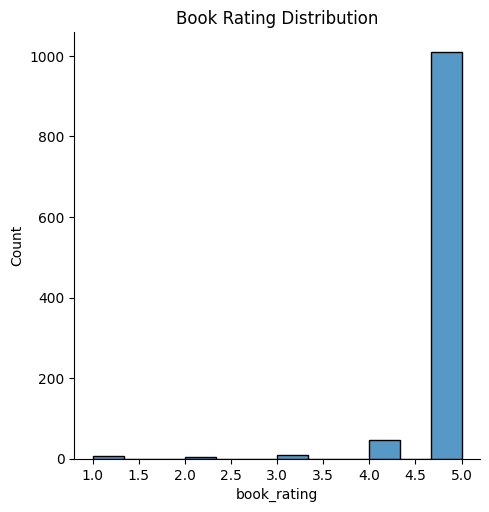

In [54]:
displot(df.book_rating, "Book Rating Distribution")

In [55]:
df.book_rating.value_counts()

book_rating
5.0    1009
4.0      46
3.0      10
1.0       6
2.0       4
Name: count, dtype: int64

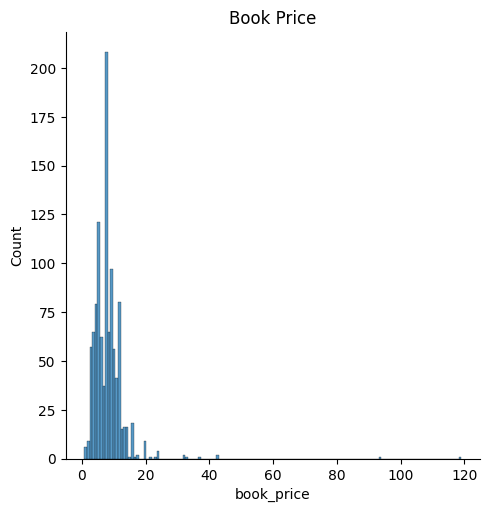

In [56]:
displot(df.book_price, 'Book Price')

In [63]:
def encoding(dataframe):
    le = LabelEncoder()
    cat_col = ['book_authors', 'book_features']
    for col in cat_col:
        dataframe[col] = le.fit_transform(dataframe[col])
    return dataframe

In [70]:
def train(model, train_x, train_y, test_x, test_y, ):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    r2 = r2_score(test_y, pred)
    cv_score = cross_val_score(model, train_x, train_y,
                               scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print(f"{model.__str__()} Model Report")
    print("CV Score:", cv_score)
    print("The R2 Score:", r2)
    print("")

In [78]:
def coef_plot(model_coef, model_name):
    coef = pd.Series(model_coef, X.columns).sort_values(ascending=False)
    plot_title = "Model Coefficients - " + model_name
    coef.plot(kind='bar', title=plot_title)
    plt.savefig(BASE_DIR + f"/visualization/{model_name}.png")

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

In [73]:
df = encoding(df)

In [83]:
df.book_price = np.log(df.book_price)

In [84]:
X = df.drop(columns=['book_price'])
y = df['book_price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

LinearRegression() Model Report
CV Score: 0.2306159023962236
The R2 Score: 0.10929166267124168



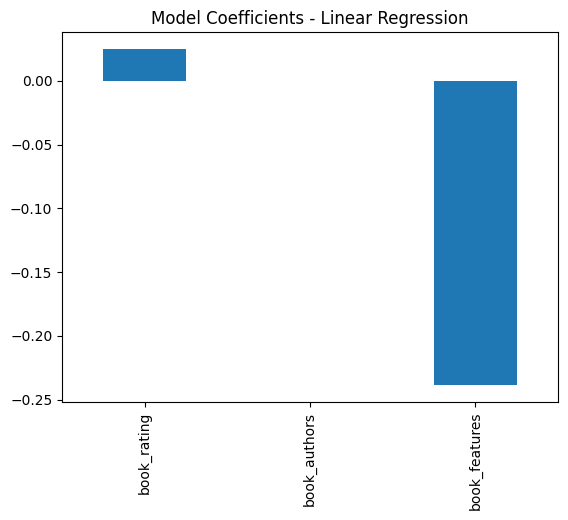

In [85]:
lr = LinearRegression()
train(lr, X_train, y_train, X_test, y_test)
coef_plot(lr.coef_, 'Linear Regression')

DecisionTreeRegressor() Model Report
CV Score: 0.35188649858359144
The R2 Score: -0.5690737710796845



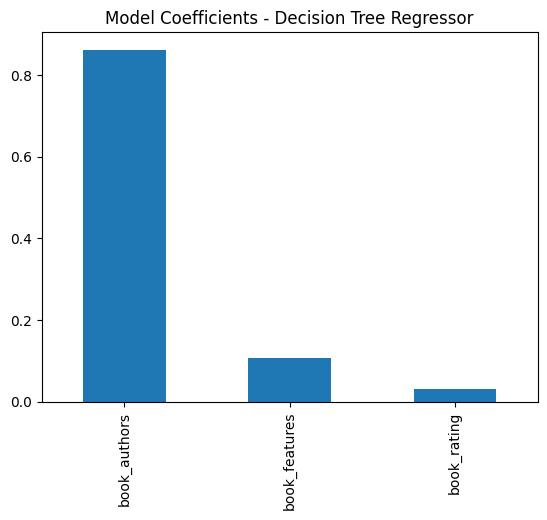

In [86]:
dtree = DecisionTreeRegressor()
train(dtree, X_train, y_train, X_test, y_test)
coef_plot(dtree.feature_importances_, 'Decision Tree Regressor')

RandomForestRegressor() Model Report
CV Score: 55.23033984374605
The R2 Score: -0.8351474345035994



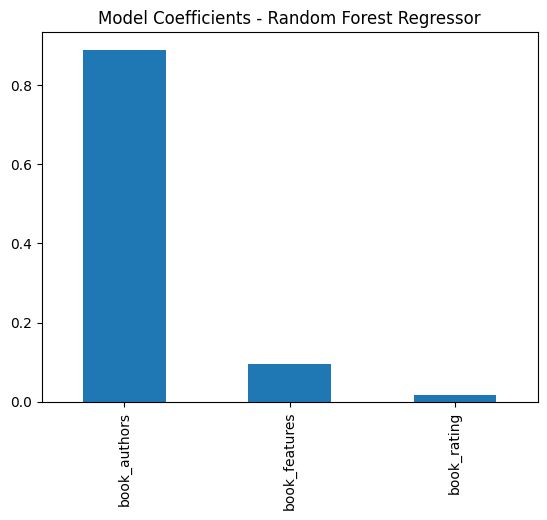

In [81]:
rand_forest = RandomForestRegressor()
train(rand_forest, X_train, y_train, X_test, y_test)
coef_plot(rand_forest.feature_importances_, 'Random Forest Regressor')